<br><font face="Times New Roman" size=5><div dir=ltr align=center>
<font color=blue size=8>
    Introduction to Machine Learning <br>
<font color=red size=5>
    Sharif University of Technology - Computer Engineering Department <br>
    Fall 2022<br> <br>
<font color=black size=6>
    Homework 2: Practical - SVM
    <br>
<font color=black size=4>
    Alireza Gargoori Motlagh, Alireza Heidari
    
<br><br>
<font size=4>
   **Name**: Nona Ghazizadeh<br>
   **Student ID**: 98171007<br> <br>
In this homework, we are going to implement the algorithms from the second and third chapters of the course, so reading the notebooks of these chapters would be quite useful. Also, we are going to evaulate and compare our models by the metrics defined in chapter 3. Keep in mind to complete all of the following questions and write your own codes in the TODO parts.

## <font face="Times New Roman" size=4><div dir=ltr>
## Problem 3: Face Classification by SVM on Eigenfaces (150 points)
In the following problem, we are going to build a classifier to distinguish the faces of 40 people on a toy dataset. The dataset includes 400 pictures of 40 people faces, each by a 64*64 pixel picture. Use the following cell to download the dataset:

In [1]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

faces = datasets.fetch_olivetti_faces()
print(faces.data.shape)
print(faces.images[0].shape)

(400, 4096)
(64, 64)


<font face="Times New Roman" size=4><div dir=ltr>
### Visualization of the Faces (5 points)
Plot an image of each class in one figure using subplots. (Note that the design matrix X is availabe in <code>faces.data</code> and the target values available in <code>faces.target</code> .)

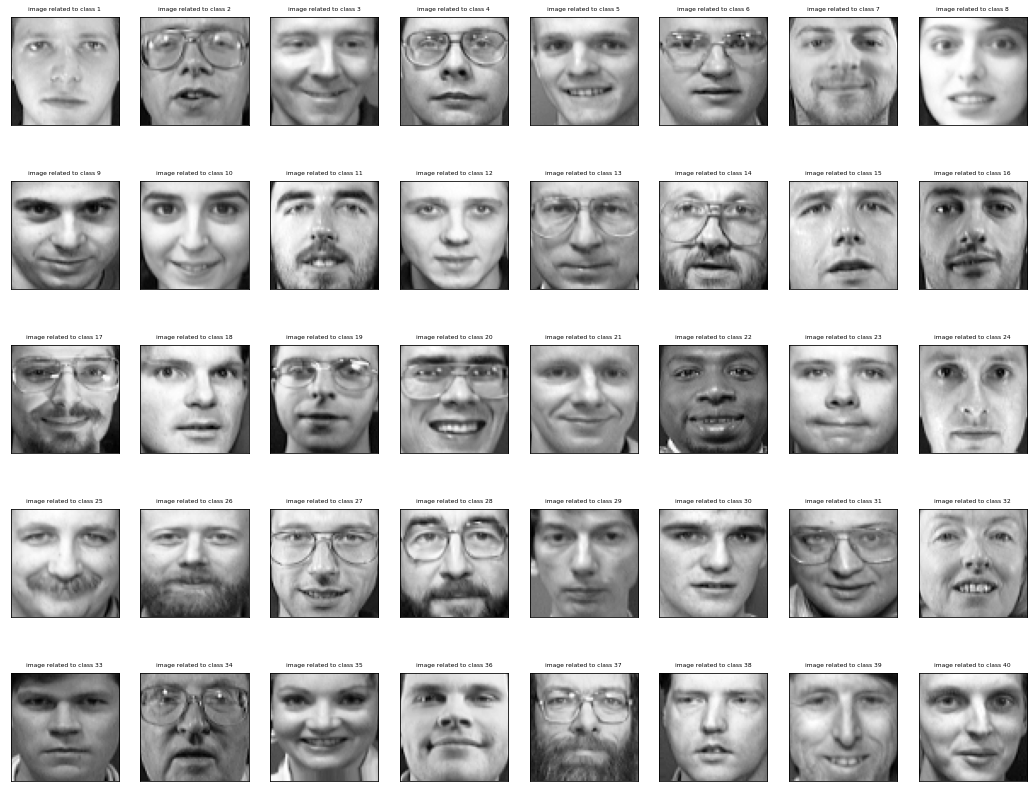

In [2]:
def plot_gallery(images, h, w, n_row=5, n_col=8):
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=0.01, right=0.99, top=0.90, hspace=0.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i*10].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(f"image related to class {i + 1}", size=6)
        plt.xticks(())
        plt.yticks(())
n_samples, h, w = faces.images.shape
plot_gallery(faces.data, h, w)

<font face="Times New Roman" size=4><div dir=ltr>
### Train-Test Split (2 points)
Split the data into train and test sets and print the dimensions of each set. (70% for train and 30% for test)

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(faces.data, faces.target, test_size=0.3, random_state=0, stratify=faces.target)
print(f'shape of X_train = {X_train.shape}')
print(f'shape of X_test = {X_test.shape}')

shape of X_train = (280, 4096)
shape of X_test = (120, 4096)


<font face="Times New Roman" size=4><div dir=ltr>
### Dimensionality Reduction (18 points)
As you might have guessed, the number of featuers, i.e. pixels, is quite large and training a classifier might take a considerbale time. However, using a wise method to reduce the dimension of our data could decrease the cost of training the model. In the following cell use PCA (Principal Component Analysis) to reduce the dimension of the dataset. Choose an appropirate number of components in your PCA and explain your reason for your choice.

In the code below we will pick principal components till we reach 0.99 variance ratio, this is a good variance in image data for PCA. Then, the algorithm automatically selects the best number of principal components that keep 99% of the variance in the original data. After that with print out how many components the algorithm has selected.

In [4]:
import numpy as np
from sklearn.decomposition import PCA

pca = PCA(n_components=0.99)
pca.fit(X_train)
print(f'number of components = {pca.explained_variance_ratio_.shape[0]}')

number of components = 200


<font face="Times New Roman" size=4><div dir=ltr>
Plot the scree plot of the proportion of the variance explained(PVE) vs principal components to determine the number of principal components for futher analysis.

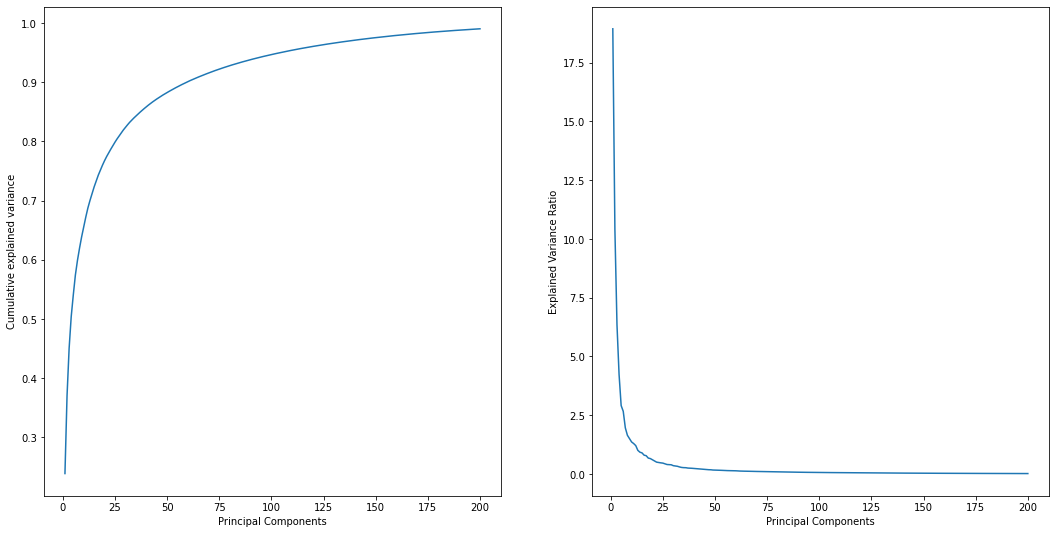

In [5]:
fig, ax = plt.subplots(1,2,figsize=(18,9))
pc_total = np.arange(1, pca.n_components_+1)
ax[0].plot(pc_total, np.cumsum(pca.explained_variance_ratio_))
ax[0].set_xlabel('Principal Components')
ax[0].set_ylabel('Cumulative explained variance')

ax[1].plot(pc_total, pca.explained_variance_)
ax[1].set_xlabel('Principal Components')
ax[1].set_ylabel('Explained Variance Ratio')
plt.show()

<font face="Times New Roman" size=4><div dir=ltr>
### Eigenfaces: Principal Components Visualization (25 points)
Plot the mean face using your PCA model with <code>pca.mean_</code> attribute followed by a reshape to original dimensions. What is this mean vector?

Mean vector is the mean of all training samples that we need in PCA for standardization.
In process of PCA first of all we subtract images from their maen.  

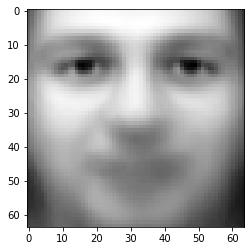

In [6]:
plt.imshow(pca.mean_.reshape(64,64), cmap='gray')
plt.show()

<font face="Times New Roman" size=4><div dir=ltr>
Eigenfaces is the name given to a set of eigenvectors when used in the computer vision problem of human face recognition. Plot the 30 first eigenfaces sorted by their rank from the most important to the lowest. Can you explain what these faces indicate?

The eigenvectors are derived from the covariance matrix of the probability distribution over the high dimensional vector space of face images. The eigenfaces themselves form a basis set of all images used to construct the covariance matrix. This produces dimension reduction by allowing the smaller set of basis images to represent the original training images. The eigenfaces form a basis set of faces that are used to construct the other faces(the mean removed faces to be exact). Everyone face can be constructed by a linear combination of the eigenfaces.

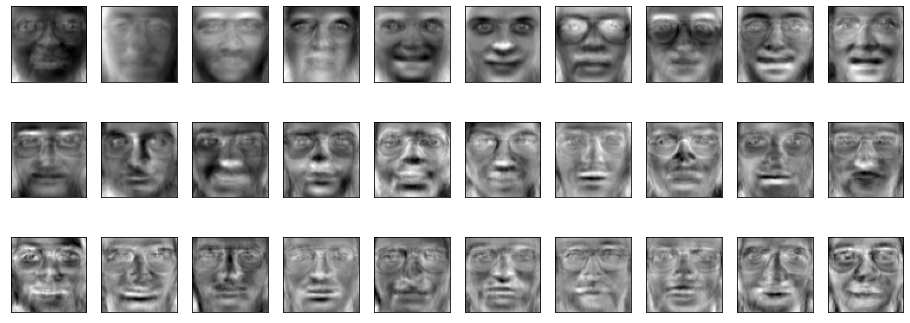

In [7]:
fig = plt.figure(figsize=(16, 6))
for i in range(30):
    ax = fig.add_subplot(3, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(pca.components_[i].reshape(faces.images[0].shape),
              cmap=plt.cm.gray)

<font face="Times New Roman" size=4><div dir=ltr>
Transform your train and test sets to the new feature space using your PCA module. 

In [8]:
X_train_new = pca.transform(X_train)
X_test_new = pca.transform(X_test)
print(f'shape of training data after transform: {X_train_new.shape}')
print(f'shape of test data after transform: {X_test_new.shape}')

shape of training data after transform: (280, 200)
shape of test data after transform: (120, 200)


<font face="Times New Roman" size=4><div dir=ltr>
### Training your SVM Classifier (50 points)
Train an SVM classifier on the transformed dataset in the new feature space. You should use Grid Search Cross Validation or other validation techniques to obtain the best hyperparameters for your classifier. 

In [9]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

param_grid = {'C': [0.01, 0.1, 0.5, 1, 5, 10], 
              'gamma': [1, 0.1, 0.01, 0.001],
              'degree': [2, 3 ],
              'kernel': ['rbf', 'poly', 'linear', 'sigmoid']} 

grid = GridSearchCV(svm.SVC(probability=True), param_grid, refit = True)
grid.fit(X_train_new, y_train)
clf = grid.best_estimator_

In [10]:
grid.best_estimator_

SVC(C=0.1, degree=2, gamma=1, kernel='linear', probability=True)

In [11]:
print(f'best score: {grid.best_score_}')

best score: 0.9571428571428571


<font face="Times New Roman" size=4><div dir=ltr>
After training your model, we can check its prediction on test samples. Run the following cell to check your model predictions with the target values on test samples. Predictions with red label indicate false classification of your model.

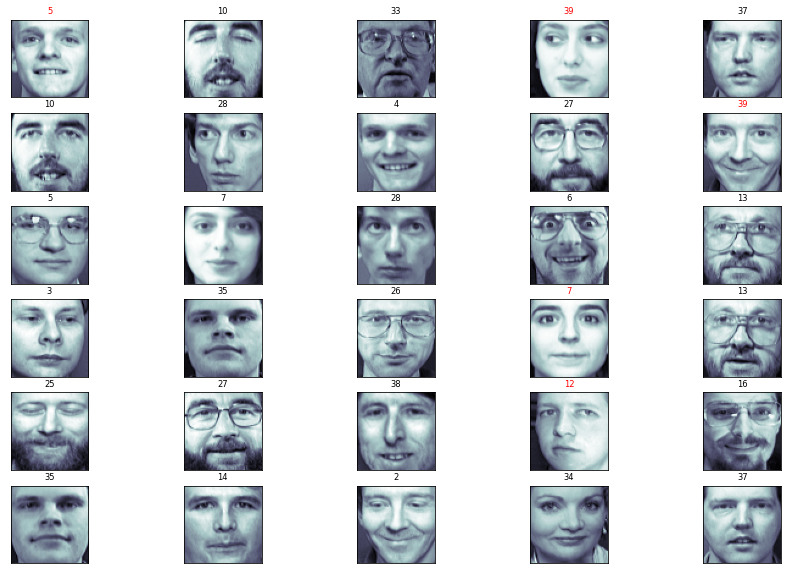

In [12]:
fig = plt.figure(figsize=(15, 10))
for i in range(30):
    ax = fig.add_subplot(6, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(X_test[i].reshape(faces.images[0].shape), cmap=plt.cm.bone)
    y_pred = clf.predict(X_test_new[i, np.newaxis])[0]
    color = ('black' if y_pred == y_test[i] else 'red')
    ax.set_title(y_pred, fontsize='small', color=color)

<font face="Times New Roman" size=4><div dir=ltr>
## Performance Measures
Let's evaluate your classifier to find out how good your model is.
    
    
### Precision Recall Tradeoff (20 points)
Plot the precision and recall versus the decision threshold figure and precision vs recall figure.

in the plot below we can see that precision and recall are equal at [([0.919], [0.919])]


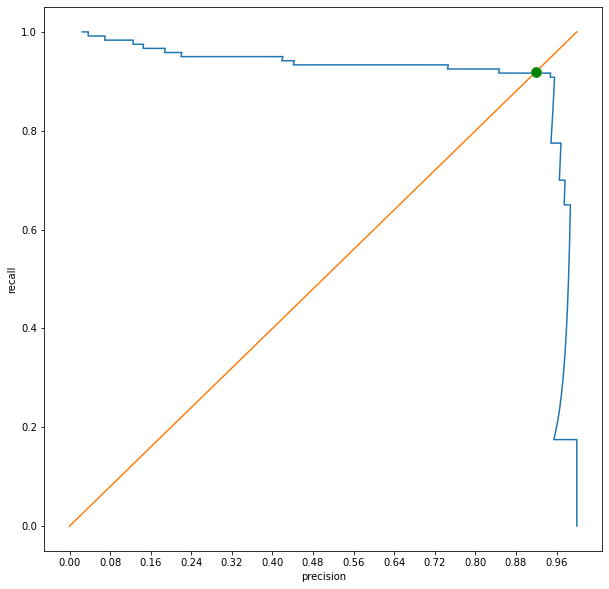

In [13]:
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import label_binarize 

y_score = clf.decision_function(X_test_new)
Y_test_binary = label_binarize(y_test, classes=list(range(40)))

precision = dict()
recall = dict()
for i in range(40):
    precision[i], recall[i], _ = precision_recall_curve(Y_test_binary[:, i], y_score[:, i])

precision["micro"], recall["micro"], _ = precision_recall_curve(
    Y_test_binary.ravel(), y_score.ravel()
)

plt.figure(figsize=(10,10))
plt.plot(precision["micro"], recall["micro"])
plt.plot(np.linspace(0, 1, 100),np.linspace(0, 1, 100))
plt.xticks(np.arange(0, 1, step=0.08))

plt.xlabel("precision")
plt.ylabel("recall")

x_point = [0.919]
y_point = [0.919]
plt.plot(x_point, y_point, marker="o", markersize=10, markerfacecolor="green")
print(f'in the plot below we can see that precision and recall are equal at [{x_point, y_point}]')

<font face="Times New Roman" size=4><div dir=ltr>
Then find the decision threshold, where the recall is equal to the precision. Write down it in the below cell:
    <br>
note: it should be apparent in the above figures.

decision_threshold = considering that there is no need to plot precision and recall versus the decision threshold, we don't need to calculate this value

recall at the above threshold = 0.919

<font face="Times New Roman" size=4><div dir=ltr>
### ROC/AUC (10 points)
Train a RandomForestClassifier with 30 estimators then plot a ROC curve, and calculate AUC for both randomForsetClassifier and your SVM classifier that you trained earlier, which one is the best by considering AUC indicator?


In [14]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=30, max_depth=2, random_state=0)
rf_clf.fit(X_train_new, y_train)

RandomForestClassifier(max_depth=2, n_estimators=30, random_state=0)

random forest auc = 0.9352564102564103
svm auc = 0.9924501424501425


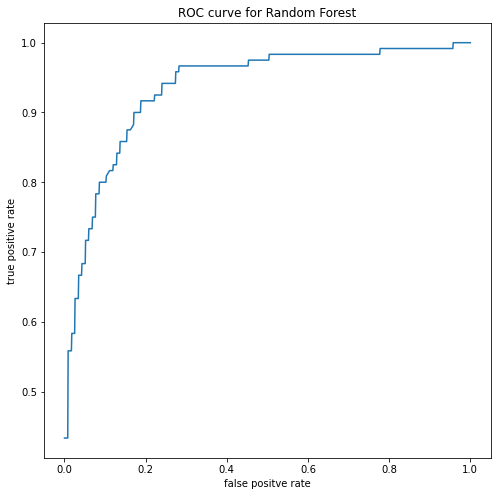

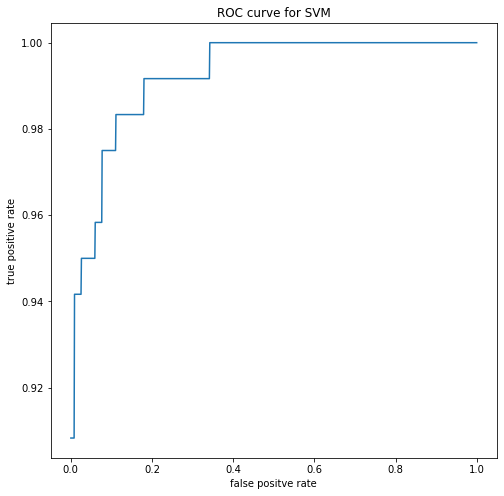

In [15]:
from sklearn.metrics import roc_curve, roc_auc_score

def get_roc_auc(clf):
    y_score = clf.predict_proba(X_test_new)
    Y_test_binary = label_binarize(y_test, classes=list(range(40)))

    fpr, tpr = dict(), dict()
    for i in range(40):
        fpr[i], tpr[i], _ = roc_curve(Y_test_binary[:, i], y_score[:, i])

    fpr_grid = np.linspace(0.0, 1.0, 1000)

    mean_tpr = np.zeros_like(fpr_grid)

    for i in range(40):
        mean_tpr += np.interp(fpr_grid, fpr[i], tpr[i])

    mean_tpr /= 40

    fpr["macro"] = fpr_grid
    tpr["macro"] = mean_tpr
    
    return fpr, tpr, roc_auc_score(Y_test_binary, y_score)

fpr_rf, tpr_rf, auc_rf = get_roc_auc(rf_clf)
fpr_svm, tpr_svm, auc_svm = get_roc_auc(clf)
plt.figure(figsize=(8,8))
plt.plot(fpr_rf["macro"], tpr_rf["macro"])
plt.title("ROC curve for Random Forest")
plt.xlabel("false positve rate")
plt.ylabel("true positive rate")

plt.figure(figsize=(8,8))
plt.plot(fpr_svm["macro"], tpr_svm["macro"])
plt.title("ROC curve for SVM")
plt.xlabel("false positve rate")
plt.ylabel("true positive rate")

print(f'random forest auc = {auc_rf}')
print(f'svm auc = {auc_svm}')


As we can see SVM auccuracy is better than Random Forest, hence SVM is better.

<font face="Times New Roman" size=4><div dir=ltr>
### Classification Report (5 points)
Use the <code>classification_report</code> to describe the performance of your SVM model with different metrics. Explain your results and compare the predictions of model on different classes in few sentences.

Classification report is used to measure the quality of predictions from a classification algorithm. How many predictions are true and how many are false. More specifically, true positives, false positives, true negatives and false negatives are used to predict the metrics of a classification report.

We give definition for each metric in this report:
Precision: the ability of a classifier not to label an instance positive that is actually negative. For each class it is defined as the ratio of true positives to the sum of true and false positives.

Recall: the ability of a classifier to find all positive instances. For each class it is defined as the ratio of true positives to the sum of true positives and false negatives.

F1 score: a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0. Generally speaking, F1 scores are lower than accuracy measures as they embed precision and recall into their computation. As a rule of thumb, the weighted average of F1 should be used to compare classifier models, not global accuracy.

Support: The number of actual occurrences of the class in the specified dataset. Imbalanced support in the training data may indicate structural weaknesses in the reported scores of the classifier and could indicate the need for stratified sampling or rebalancing. Support doesn’t change between models but instead diagnoses the evaluation process.

With the given definition fot each metric we can configure that the model is good as we can see the prescion and recall in all classes are almost same which and near to 1.0, which is optimal and also we know that the closer the value of the F1 score is to 1.0, the better the expected performance of the model is. As we can see for all of our classes, our F1 score is near to 1.0.

If we get out misclassified faces in the confusion matrix we can figure out that our model is good considering that those faces are similar and a human might make mistake.

ps: due to small amount of data in some cases we might not have any data for specific classes and it tend to have precision, recall and f1-score equal to zero.

In [16]:
from sklearn.metrics import classification_report

y_pred = clf.predict(X_test_new)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       1.00      1.00      1.00         3
           2       1.00      0.67      0.80         3
           3       0.75      1.00      0.86         3
           4       1.00      0.67      0.80         3
           5       0.75      1.00      0.86         3
           6       1.00      1.00      1.00         3
           7       0.67      0.67      0.67         3
           8       1.00      1.00      1.00         3
           9       1.00      0.67      0.80         3
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         3
          12       0.50      0.67      0.57         3
          13       1.00      1.00      1.00         3
          14       0.75      1.00      0.86         3
          15       1.00      1.00      1.00         3
          16       1.00      1.00      1.00         3
          17       1.00    

<font face="Times New Roman" size=4><div dir=ltr>
### Confusion Matrix (15 points)
Plot the confusion matrix of the classifier's predictions.
Let’s focus on the errors of the plot. Divide each value in the confusion matrix by the number of images in the corresponding class so that you can compare error rates instead of absolute number of errors, then plot the result.

In [17]:
# TODO: calculate conf_mx then print it
conf_mx = confusion_matrix(y_test, clf.predict(X_test_new))
conf_mx

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 3, 0, ..., 0, 0, 0],
       [0, 0, 2, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 3, 0, 0],
       [0, 0, 0, ..., 0, 3, 0],
       [0, 0, 0, ..., 0, 0, 3]])

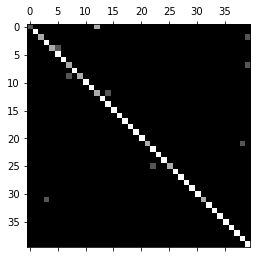

In [18]:
# TODO: after calculating confusion matrix, visualize it using below code
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

In [19]:
# TODO: calculate norm_conf_mx then print it
norm_conf_mx = conf_mx / conf_mx.sum(axis=0)
print(norm_conf_mx)

[[1.   0.   0.   ... 0.   0.   0.  ]
 [0.   1.   0.   ... 0.   0.   0.  ]
 [0.   0.   1.   ... 0.   0.   0.2 ]
 ...
 [0.   0.   0.   ... 1.   0.   0.  ]
 [0.   0.   0.   ... 0.   0.75 0.  ]
 [0.   0.   0.   ... 0.   0.   0.6 ]]


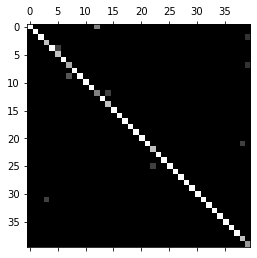

In [20]:
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()